# Importing FB Prophet for Time Series Forecasting

In [2]:
# check prophet version
import prophet
# print version number
print('Prophet %s' % prophet.__version__)

Prophet 1.0


Loading the Data

In [3]:
# load the car sales dataset
from pandas import read_csv
# load data
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0)
# summarize shape
print(df.shape)
# show first few rows
print(df.head())

(108, 2)
     Month  Sales
0  1960-01   6550
1  1960-02   8728
2  1960-03  12026
3  1960-04  14395
4  1960-05  14587


Visualizing the dataset

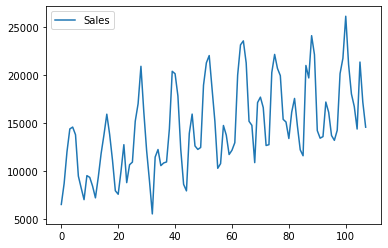

In [4]:
# plot the car sales dataset
from matplotlib import pyplot

# plot the time series
df.plot()
pyplot.show()

# Fitting the FB Prophet model

In [5]:
# fit prophet model on the car sales dataset
from pandas import to_datetime
from prophet import Prophet

# prepare expected column names
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])
# define the model
model = Prophet()
# fit the model
model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [6]:
from pandas import DataFrame
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
	date = '1968-%02d' % i
	future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])

In [7]:
# use the model to make a forecast
forecast = model.predict(future)

# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds          yhat    yhat_lower    yhat_upper
0 1968-01-01  14344.429315  12696.723235  15732.474995
1 1968-02-01  14911.718770  13379.656396  16365.142916
2 1968-03-01  20859.142961  19353.450222  22545.124210
3 1968-04-01  22883.352978  21318.119867  24445.208031
4 1968-05-01  24183.139264  22674.036984  25804.700709


Plotting forecast on graph

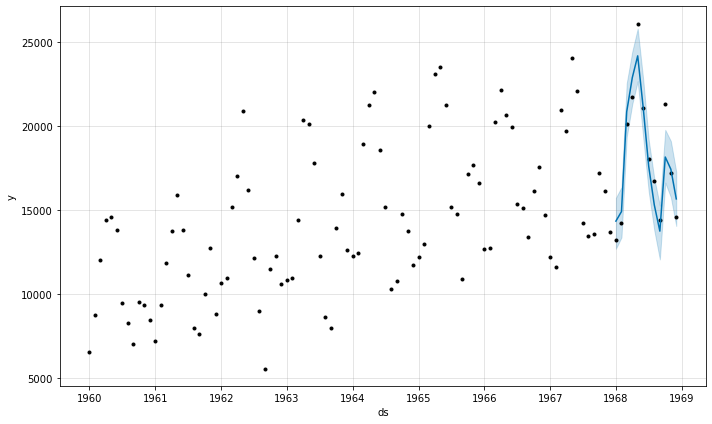

In [8]:
# plot forecast
model.plot(forecast)
pyplot.show()

# Out of sample forecast

In [9]:
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
	date = '1969-%02d' % i
	future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])

          ds          yhat    yhat_lower    yhat_upper
0 1969-01-01  15396.026630  13854.304371  17005.509223
1 1969-02-01  16165.838547  14555.789217  17750.418764
2 1969-03-01  21369.121163  19764.307079  22854.406003
3 1969-04-01  23494.793981  21917.667313  25195.042419
4 1969-05-01  25004.900023  23458.572057  26643.736800


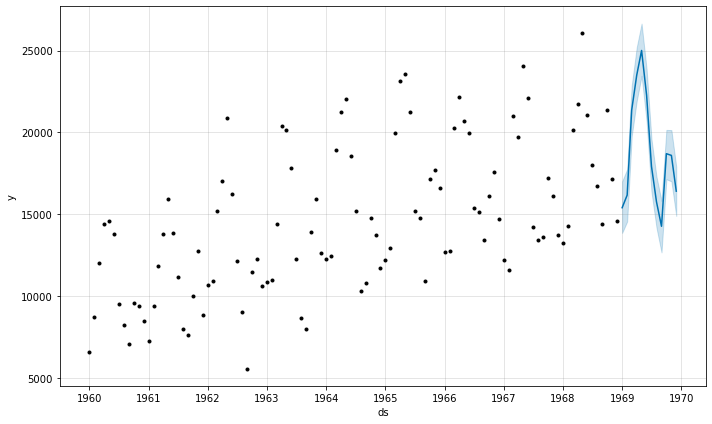

In [10]:
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
pyplot.show()

# Model Evaluation

In [11]:
# create test dataset, remove last 12 months
train = df.drop(df.index[-12:])
print(train.tail())

           ds      y
91 1967-08-01  13434
92 1967-09-01  13598
93 1967-10-01  17187
94 1967-11-01  16119
95 1967-12-01  13713


In [13]:
#from prophet import Prophet
from sklearn.metrics import mean_absolute_error


# define the model
model = Prophet()
# fit the model
model.fit(train)
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
	date = '1968-%02d' % i
	future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds'] = to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# calculate MAE between expected and predicted values for december
y_true = df['y'][-12:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MAE: 1336.814


Plot of expected vs actual value

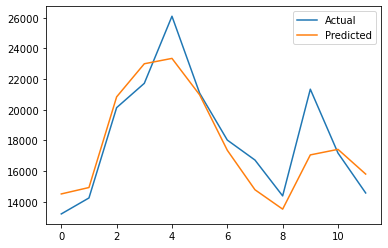

In [20]:
# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.savefig("actual_vs_expected.png") 
pyplot.show()